<a href="https://colab.research.google.com/github/Pvcunha/introducao-ciencia-dados/blob/main/introducao_ciencia_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Passenger Satisfaction

## Lendo dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.shape

(103904, 25)

## Preprocessing data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Podemos perceber algumas coias a partir dessas informações:
* Arrival Delay in Minutes possui 310 valores faltando.
* As primeiras duas colunas não servem para o nosso contexto.
* Possuímos várias colunas categoricas, tanto numéricas como com Int64.  


In [7]:
df = df.drop(columns=['Unnamed: 0', 'id'])

In [8]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Convertendo para tipo categorico todas as colunas exceto, `Age, Flight Distance, Departure Delay in Minutes, Arrival Delay In Minutes, Satisfaction`

In [9]:
except_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

In [10]:
# Não existe uma forma de fazer inplace pelo pandas
for col in df.columns:
  if col not in except_columns:
    df[col] = df[col].astype('category')
  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

Describe the information of numerical type

In [12]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Descreve informação dos tipos categóricos

In [13]:
df.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


### Tratando dados faltantes

Substituimos os dados faltantes pela mediana da coluna para não descartarmos as linhas.

In [14]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), axis=0)

In [15]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Normalização e discretização dos dados

Separando os dados categoricos e numéricos.

In [16]:
numerical_df = df._get_numeric_data().copy()
categorical_df = df.select_dtypes(include=['category']).copy()

#### Normalização de features quantitativas

In [17]:
numerical_df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit_transform(numerical_df)
scaled_numerical_df = pd.DataFrame(scaler, columns=numerical_df.columns)

In [19]:
scaled_numerical_df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,-0.169751,-0.532129,-0.981387,-0.980892
std,0.387563,0.402725,0.048029,0.048800
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.487179,-0.845315,-1.000000,-1.000000
50%,-0.153846,-0.672052,-1.000000,-1.000000
75%,0.128205,-0.308562,-0.984925,-0.983586
max,1.000000,1.000000,1.000000,1.000000


#### Lidando com dados categóricos

Divideremos em dados features binárias e multivaloradas

In [20]:
binary_cols = [col for col in categorical_df.columns if len(categorical_df[col].unique()) == 2]
nonbinary_cols = [col for col in categorical_df.columns if col not in binary_cols]

In [21]:
binary_df = categorical_df[binary_cols]
binary_df.describe(include=['category'])

,Gender,Customer Type,Type of Travel
count,103904,103904,103904
unique,2,2,2
top,Female,Loyal Customer,Business travel
freq,52727,84923,71655


Vamos binarizar as colunas

In [22]:
from sklearn.preprocessing import LabelEncoder

binary_df = binary_df.apply(LabelEncoder().fit_transform)

In [23]:
binary_df.head(5)

,Gender,Customer Type,Type of Travel
0,1,0,1
1,1,1,0
2,0,0,0
3,0,0,0
4,1,0,0


Agora vamos fazer o one hot encoding para as outras colunas categoricas multivaloradas

In [24]:
nonbinary_df = categorical_df[nonbinary_cols]
nonbinary_df.describe(include=['category'])

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


In [25]:
dummies_nonbinary_df = pd.get_dummies(nonbinary_df)

In [26]:
dummies_nonbinary_df.head(5)

,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Removendo outliers em dados numéricos

#### Abordagem z-score

O z-score mede a distancia que um valor está longe da média do seu conjunto. para detecção de outliers é utilizado um valor de normalmente +/- 3

In [27]:
from scipy import stats
isoutliers = np.abs(stats.zscore(numerical_df) < 3).all(axis=1)
numerical_df['outliers_zscore'] = np.multiply(isoutliers, 1)

In [28]:
numerical_df.head(5)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,outliers_zscore
0,13,460,25,18.0,1
1,25,235,1,6.0,1
2,26,1142,0,0.0,1
3,25,562,11,9.0,1
4,61,214,0,0.0,1


In [29]:
numerical_df[numerical_df['outliers_zscore'] == 0]

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,outliers_zscore
168,49,578,162,179.0,0
178,42,1372,141,125.0,0
278,40,1959,209,191.0,0
282,26,406,149,138.0,0
340,25,1796,176,164.0,0
...,...,...,...,...,...
103770,38,2940,233,223.0,0
103812,28,814,212,212.0,0
103832,49,639,225,222.0,0
103843,42,1076,171,156.0,0


#### Abordagem multivariada (Elliptic Envelope)

In [30]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(numerical_df)

EllipticEnvelope(contamination=0.01)

In [31]:
scores = detector.predict(numerical_df)

In [32]:
scores

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
numerical_df['outliers_multi'] = scores

In [34]:
numerical_df.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,outliers_zscore,outliers_multi
0,13,460,25,18.0,1,1
1,25,235,1,6.0,1,1
2,26,1142,0,0.0,1,1
3,25,562,11,9.0,1,1
4,61,214,0,0.0,1,1


In [36]:
numerical_df[numerical_df['outliers_multi'] == -1]

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,outliers_zscore,outliers_multi
278,40,1959,209,191.0,0,-1
404,25,1258,199,185.0,0,-1
582,16,2899,220,212.0,0,-1
603,37,107,232,241.0,0,-1
665,16,1325,243,226.0,0,-1
...,...,...,...,...,...,...
103707,57,282,204,202.0,0,-1
103770,38,2940,233,223.0,0,-1
103812,28,814,212,212.0,0,-1
103832,49,639,225,222.0,0,-1


## Visualização dos dados e analise descritiva

### *Cálculos*



In [ ]:
data_summary = numerical_df.describe().T.rename_axis('column_name').reset_index()
data_train = df.copy()

 **Calculating IQR**

In [ ]:
data_summary['iqr'] = data_summary['75%'] - data_summary['25%']

**Calculating Skewness and Kurtosis**

In [ ]:
data_train_skewness =  pd.DataFrame(numerical_df.skew(skipna = True).rename_axis('column_name').reset_index().rename(columns = {0:'skewness'}))
data_train_kurtosis = pd.DataFrame(numerical_df.kurtosis(skipna = True).rename_axis('column_name').reset_index().rename(columns = {0:'skewness'}))
data_train_kurtosis

,column_name,skewness
0,id,-1.198112
1,Age,-0.719227
2,Flight_Distance,0.269306
3,Departure_Delay_in_Minutes,101.466714
4,Arrival_Delay_in_Minutes,94.537006


**Adicionando esses calculos ao sumario**



In [ ]:
data_summary = data_summary.merge(data_train_skewness, on = 'column_name').merge(data_train_kurtosis, on = 'column_name')
data_summary

,column_name,count,mean,std,min,25%,50%,75%,max,iqr,skewness_x,skewness_y
0,id,103594.0,64942.428625,37460.816597,1.0,32562.25,64890.0,97370.5,129880.0,64808.25,0.002057,-1.198112
1,Age,103594.0,39.380466,15.113125,7.0,27.00,40.0,51.0,85.0,24.00,-0.004306,-0.719227
2,Flight_Distance,103594.0,1189.325202,997.297235,31.0,414.00,842.0,1743.0,4983.0,1329.00,1.109886,0.269306
3,Departure_Delay_in_Minutes,103594.0,14.747939,38.116737,0.0,0.00,0.0,12.0,1592.0,12.00,6.769049,101.466714
4,Arrival_Delay_in_Minutes,103594.0,15.178678,38.698682,0.0,0.00,0.0,13.0,1584.0,13.00,6.596637,94.537006


### Visualizando outliers

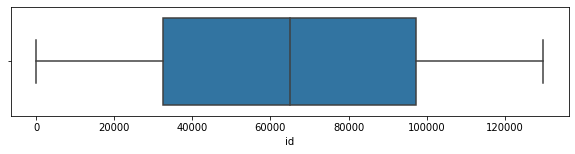

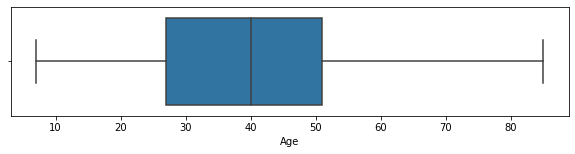

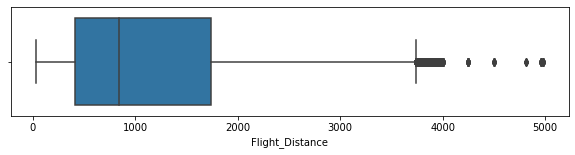

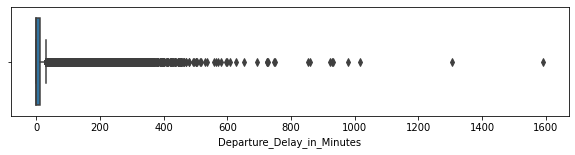

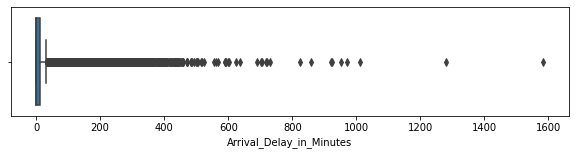

In [ ]:
for column in numerical_df.columns:
    plt.figure(figsize = (10,2))  
    sns.boxplot(data = data_train, x = column)

Visualmente, há um atraso em Departure_Delay_in_Minutes and Arrival_Delay_in_Minutes

In [ ]:
flight_distance_upper = data_summary[data_summary['column_name'] == 'Flight_Distance'][['upper_bound']].iloc[0,0]
flight_distance_lower = data_summary[data_train_skewness['column_name'] == 'Flight_Distance'][['lower_bound']].iloc[0,0]

print("Flight Distance upper: {}".format(flight_distance_upper))
print("Flight Distance lower: {}".format(flight_distance_lower))

flight_distance_outlier = data_train[(data_train["Flight_Distance"] < flight_distance_lower) | 
                       (data_train["Flight_Distance"] > flight_distance_upper)]

print(flight_distance_outlier['Flight_Distance'])
flight_distance_outlier.groupby('Flight_Distance')['Flight_Distance'].count()

Flight Distance upper: 3736.5
Flight Distance lower: -1579.5
80        3960
173       3747
201       3854
215       3753
379       3995
          ... 
103565    3881
103648    3890
103727    3990
103865    3795
103889    3885
Name: Flight_Distance, Length: 2287, dtype: int64


Flight_Distance
3737     8
3738     6
3739     6
3740    11
3741     4
        ..
4243    18
4502    10
4817     5
4963    13
4983    12
Name: Flight_Distance, Length: 269, dtype: int64

## Visualização dos dados e análise.




Visualização da coluna do alvo



In [ ]:
# Check data balance of target variable
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

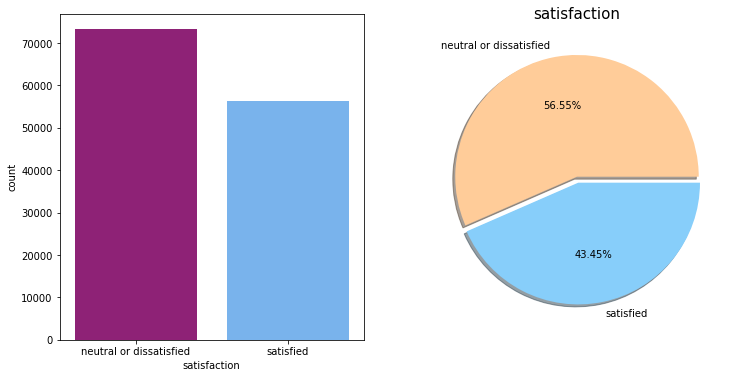

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', data=data, palette=["#a01080","#66b3ff"])

plt.subplot(1, 2, 2)
plt.pie(data['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["#ffcc99","lightskyblue"])
plt.title('satisfaction', fontsize=15)

plt.show()

A nossa coluna alvo consiste em duas categorias que são "neutras ou 
insatisfeitas" e "satisfeitas". A quantidade de passageiros neutros ou insatisfeitos é maior nos dados. Como mostrado no gráfico, podemos dizer que não temos qualquer problema de desequilíbrio.

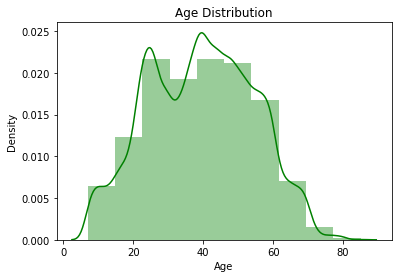

In [ ]:
sns.distplot(data_train.Age, bins=10, color='green')
plt.title("Age Distribution")
plt.show()

**Criando dois gráficos do tipo pie**

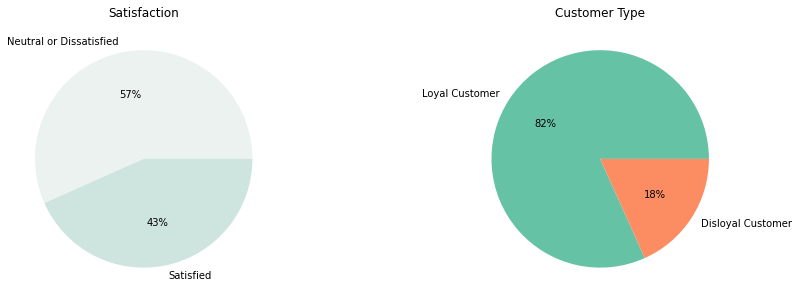

Counter({'neutral or dissatisfied': 58697, 'satisfied': 44897})
Counter({'Loyal Customer': 84662, 'disloyal Customer': 18932})


In [ ]:
fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
ax1 = plt.subplot2grid((1,2),(0,0))
colors = sns.color_palette('light:#5A9')[0:2]
plt.pie(data_train.satisfaction.value_counts(), labels = ['Neutral or Dissatisfied', 'Satisfied'], colors = colors, autopct='%.0f%%')
plt.title('Satisfaction')

ax1 = plt.subplot2grid((1,2),(0,1))
color2 = sns.color_palette('Set2')[0:3]
plt.pie(data_train['Customer Type'].value_counts(), labels = ['Loyal Customer', 'Disloyal Customer'], colors = color2, autopct='%.0f%%')
plt.title('Customer Type')
plt.show()

print(Counter(data_train.satisfaction))
print(Counter(data_train['Customer Type']))

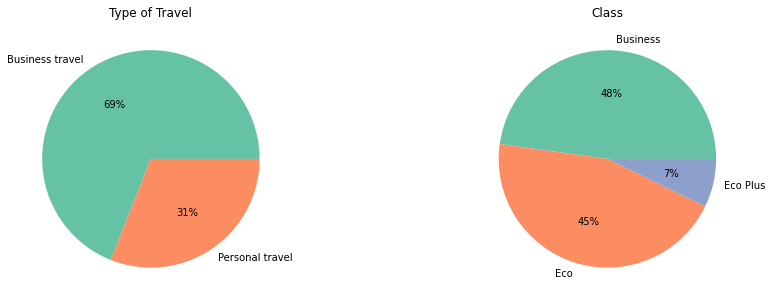

Counter({'Business travel': 71465, 'Personal Travel': 32129})
Counter({'Business': 49533, 'Eco': 46593, 'Eco Plus': 7468})


In [ ]:
fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(data_train['Type of Travel'].value_counts(), labels = ['Business travel', 'Personal travel'], colors = color2, autopct='%.0f%%')
plt.title('Type of Travel')

ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(data_train['Class'].value_counts(), labels = ['Business', 'Eco', 'Eco Plus'], colors = color2, autopct='%.0f%%')
plt.title('Class')
plt.show()

print(Counter(data_train['Type of Travel']))
print(Counter(data_train['Class']))

Foram coletados 103594 respostas dos passageiros com idade entre 7-85 anos com 82% de lealdade no total. A maioria dos objetivos dos voos eram de negocios, mas apenas 48% dos passageiros compraram passagens de classe de Business. Assim como a variavel target, a distribuição de passageiros foi bastante balanceada.

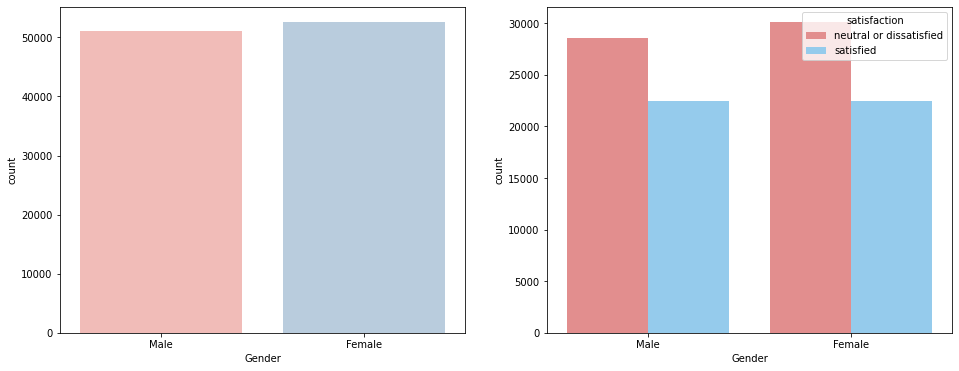

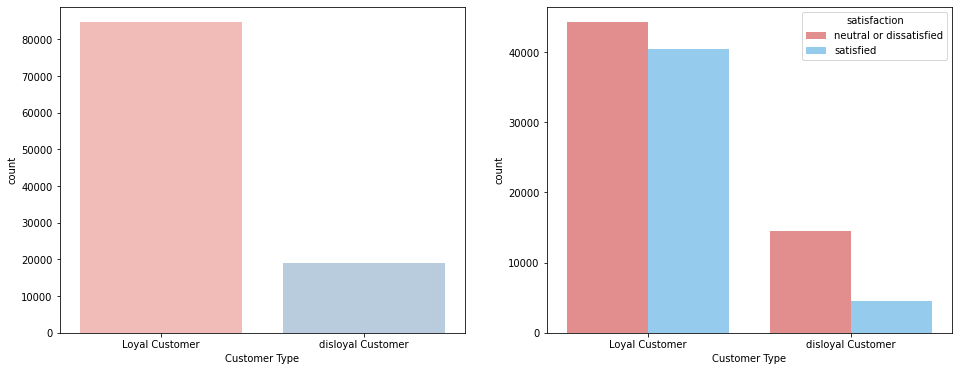

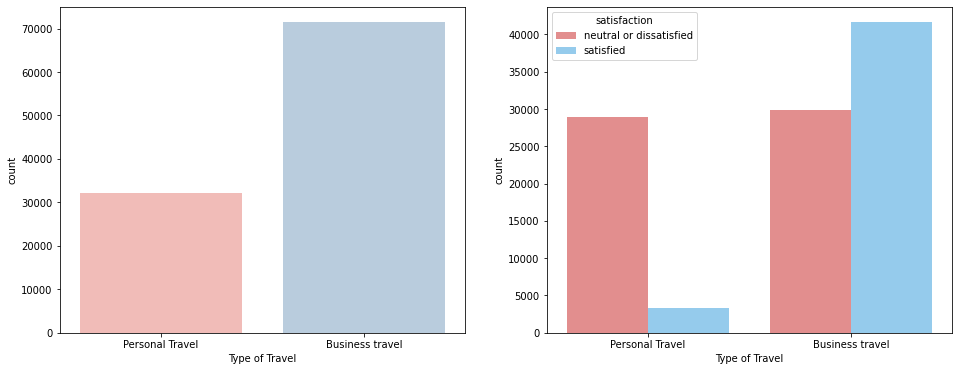

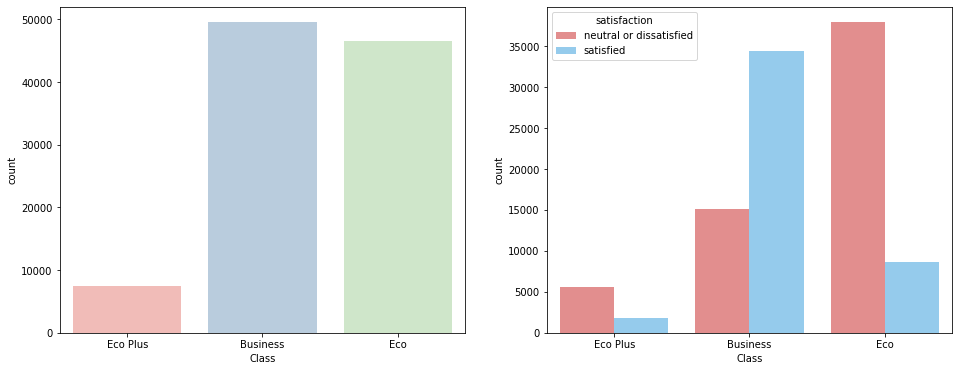

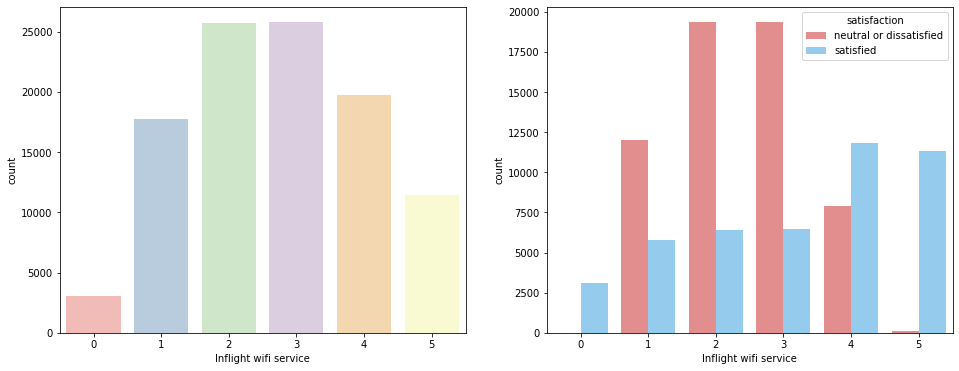

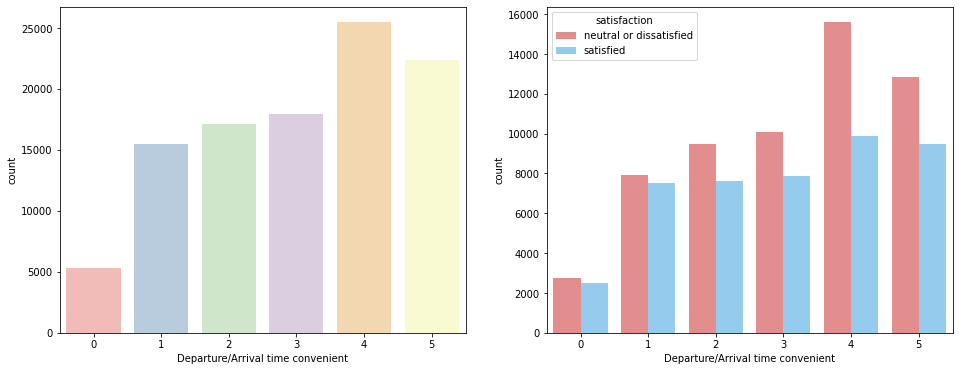

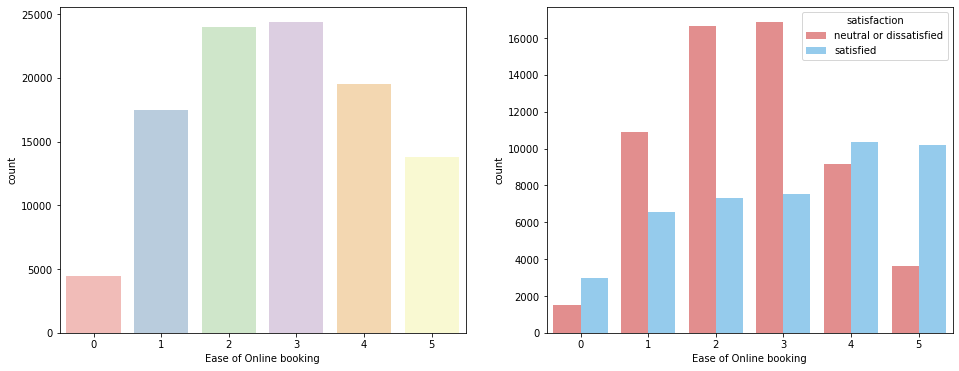

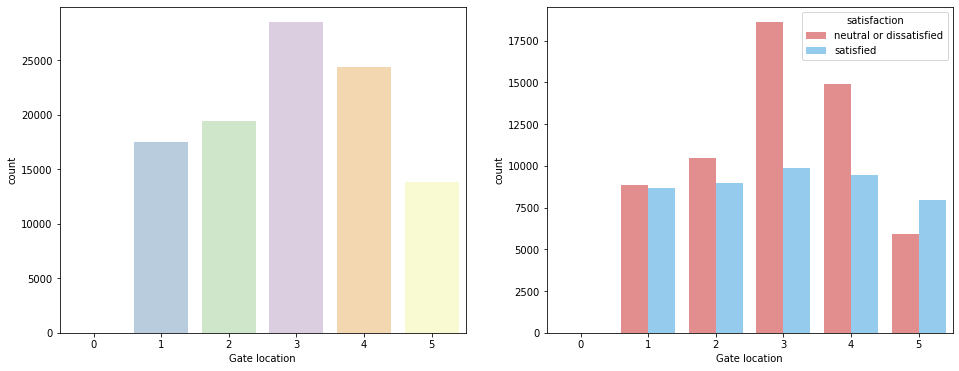

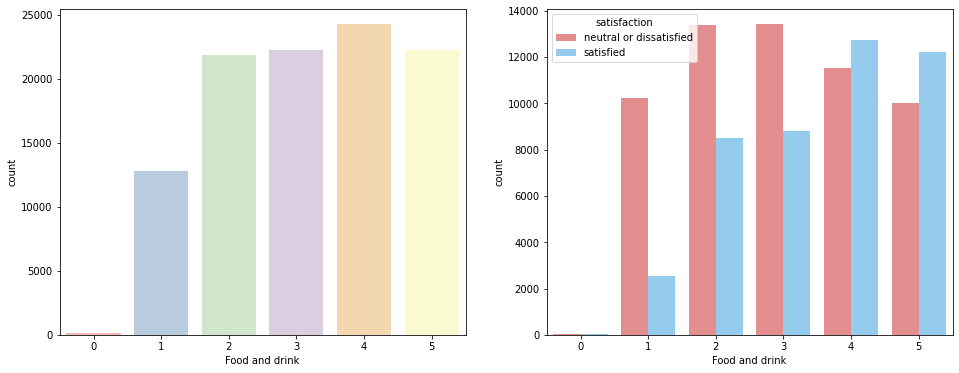

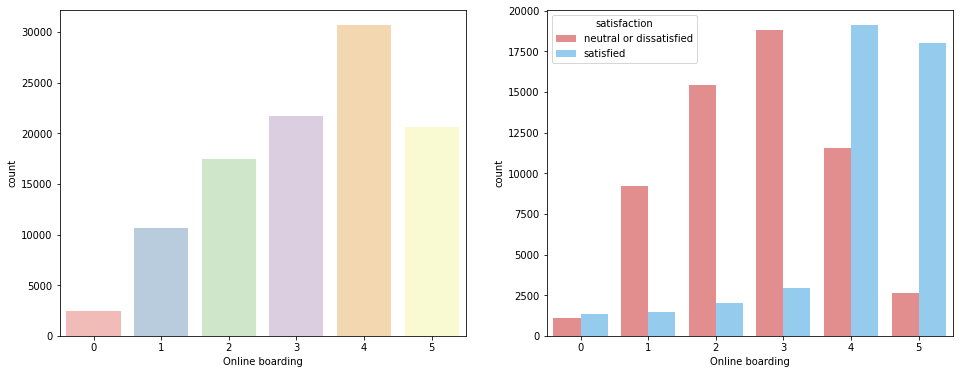

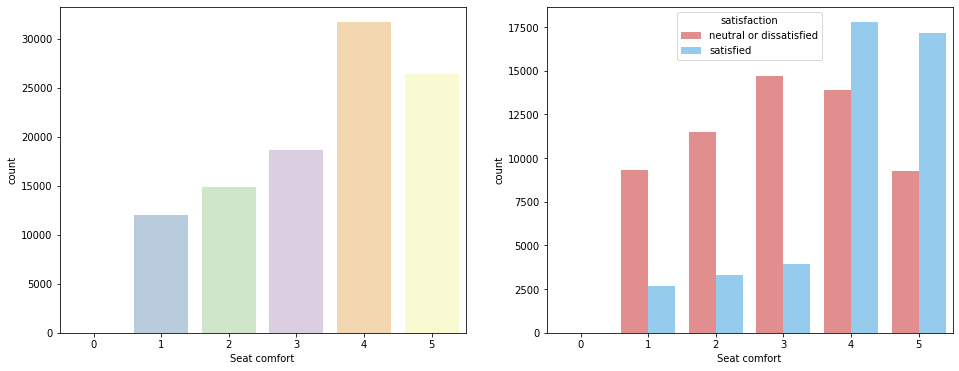

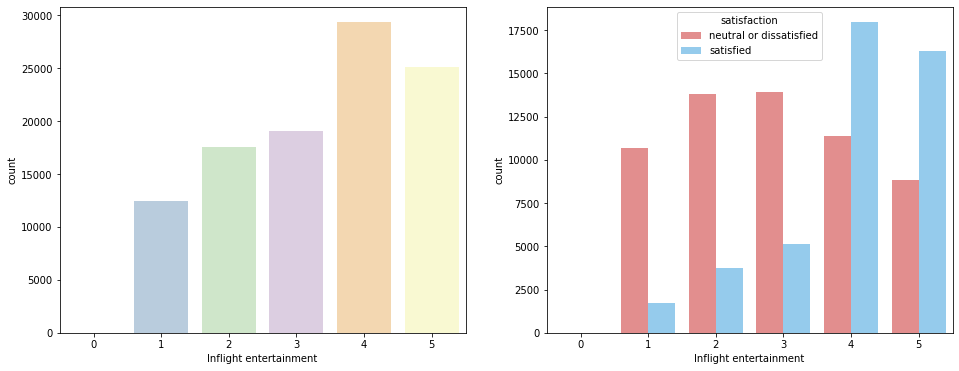

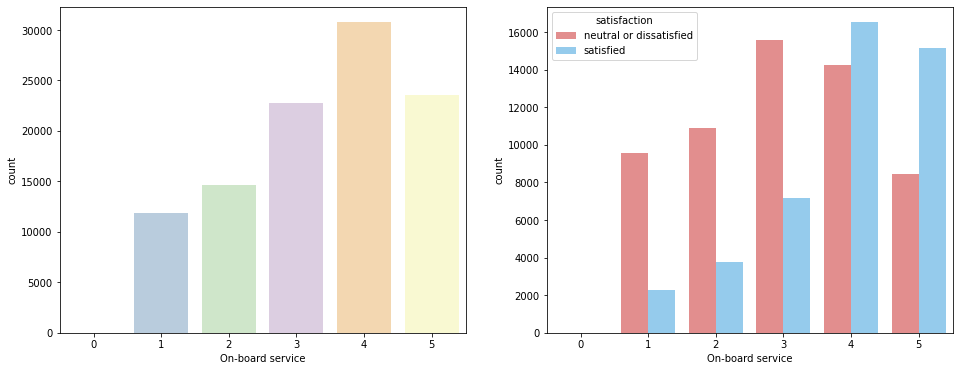

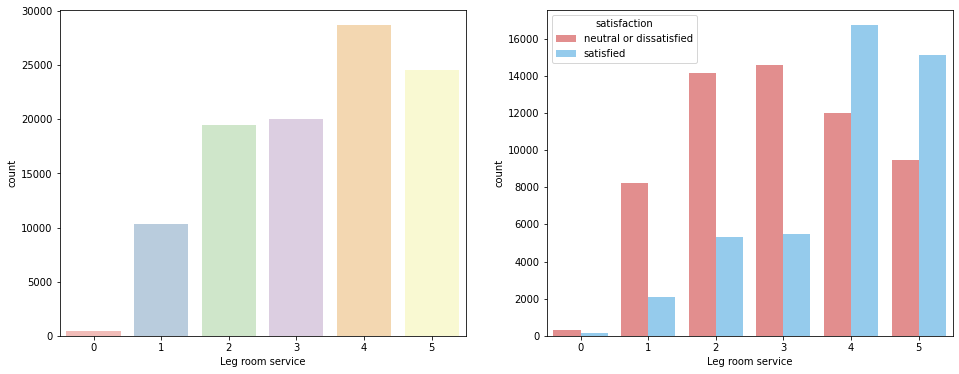

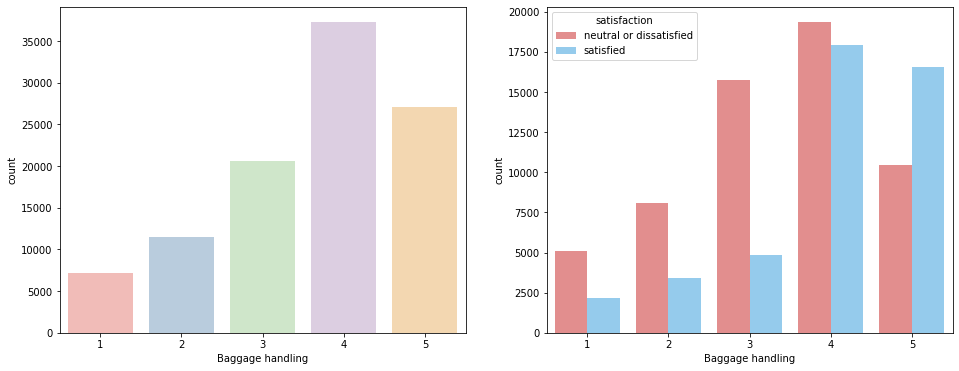

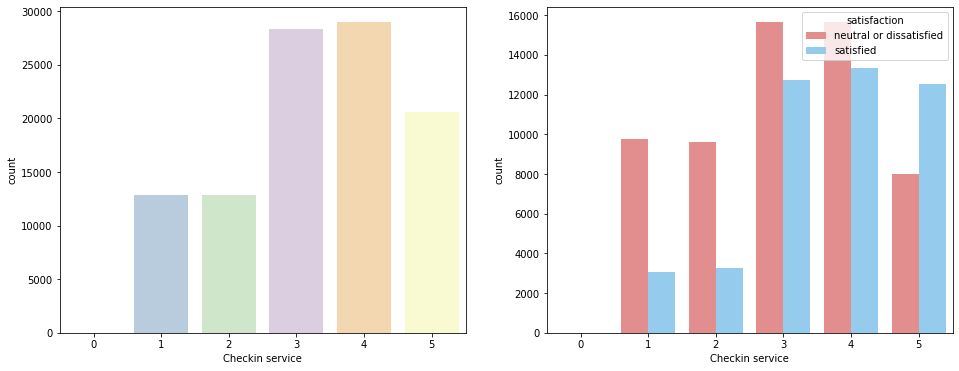

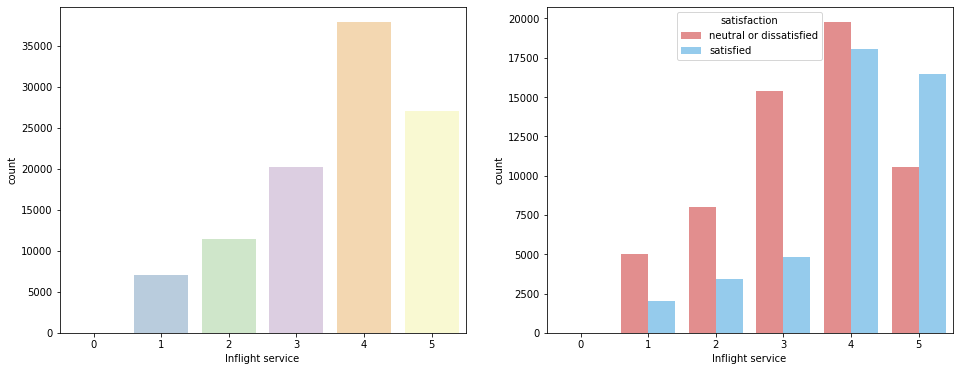

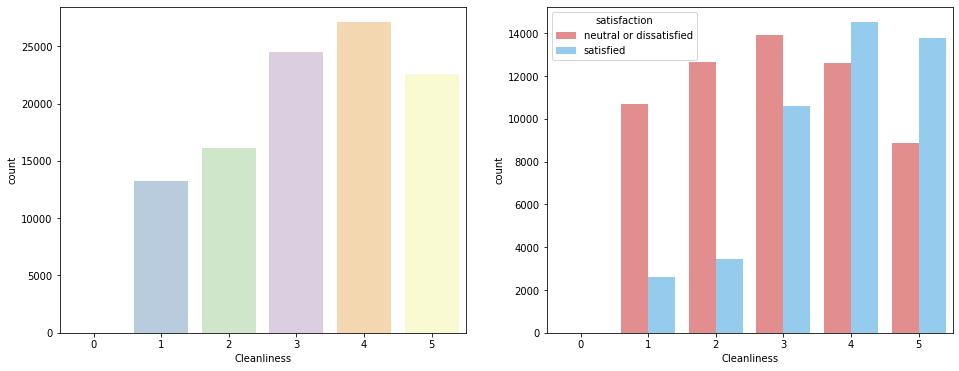

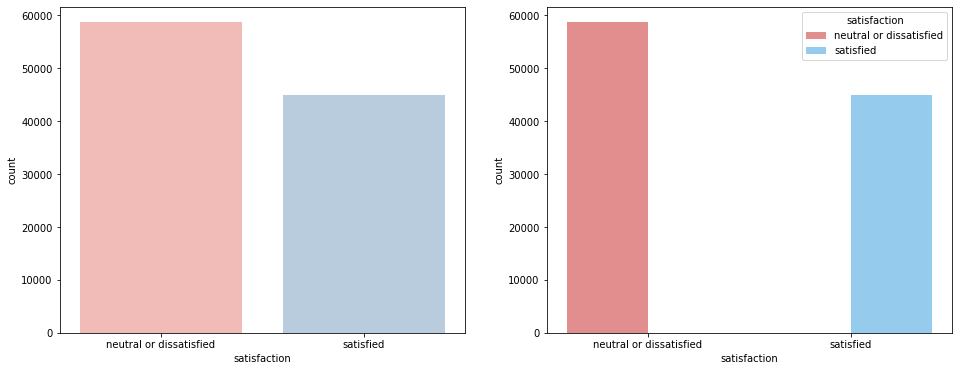

In [ ]:
for i in vars_categorical:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=data_train[i],palette="Pastel1")

  plt.subplot(1,2,2)
  sns.countplot(x=data_train[i],hue=data_train.satisfaction, palette=["#f08080","#87cefa"])
  plt.show()

Analisando a dataset notamos que grande parte das variáveis categóricaspossuem uma classificação de satisfação entre 1-5( sendo 1 mais baixa e 5 o nivel mais alto ).

**Retirando as variaveis categoricas que não possuem esse classificador**

In [ ]:
var_categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient',
'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

In [ ]:
data_train[var_categorical].mean().sort_values(ascending=False)

Inflight service                     3.640761
Baggage handling                     3.631687
Seat comfort                         3.439765
On-board service                     3.382609
Inflight entertainment               3.358341
Leg room service                     3.351401
Checkin service                      3.304323
Cleanliness                          3.286397
Online boarding                      3.250497
Food and drink                       3.202126
Departure/Arrival time convenient    3.060081
Gate location                        2.977026
Ease of Online booking               2.756984
Inflight wifi service                2.729753
dtype: float64

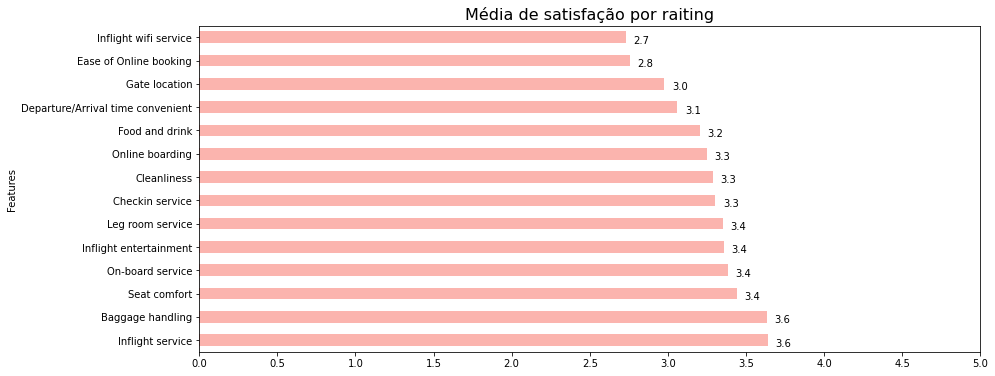

In [ ]:
total = float(len(data_train))
ax = data_train[var_categorical].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(14,6))
plt.title('Média de satisfação por raiting', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

### Correlação

In [ ]:
#Mudar as variáveis categóricas em factores 

cat_features = data_train.select_dtypes(include=['object']).columns.tolist()
data_train[cat_features] = data_train[cat_features].apply(lambda x: pd.factorize(x)[0])
data_train.dtypes

id                                     int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight_Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

In [ ]:
#colocando 1 em satisfeito e mostrando a quantidade

data_train.satisfaction = data_train.satisfaction.replace([0, 1,], [1, 0])
Counter(data_train.satisfaction)

Counter({1: 58697, 0: 44897})

In [ ]:
cor = data_train.corr(method ='pearson')
cor = round(abs(cor.satisfaction), 2)
cor.sort_values(ascending=False)

satisfaction                         1.00
Online boarding                      0.50
Type of Travel                       0.45
Inflight entertainment               0.40
Seat comfort                         0.35
On-board service                     0.32
Class                                0.32
Cleanliness                          0.31
Leg room service                     0.31
Flight_Distance                      0.30
Inflight wifi service                0.28
Baggage handling                     0.25
Inflight service                     0.24
Checkin service                      0.24
Food and drink                       0.21
Customer Type                        0.19
Ease of Online booking               0.17
Age                                  0.14
Arrival_Delay_in_Minutes             0.06
Departure/Arrival time convenient    0.05
Departure_Delay_in_Minutes           0.05
Gender                               0.01
id                                   0.01
Gate location                     

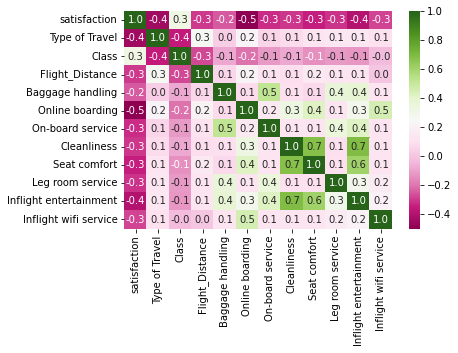

In [ ]:
import numpy as np
f = (data_train.loc[:, ['satisfaction', 'Type of Travel', 'Class', 'Flight_Distance', 'Baggage handling', 
                    'Online boarding', 'On-board service', # flight 
                    'Cleanliness', 'Seat comfort', 'Leg room service', 'Inflight entertainment', 
                    'Inflight wifi service' # in-flight
                    ]]).corr();
sns.heatmap(f, cmap='PiYG', annot=True, fmt='.1f');

In [ ]:
data_train = pd.read_csv("../content/train.csv")

In [ ]:
X = data_train[['satisfaction', 'Baggage handling', 
                'Online boarding', 'On-board service',
                'Cleanliness', 'Seat comfort', 'Leg room service', 'Inflight entertainment', 
                'Inflight wifi service', 'Inflight service'
                ]]     
def plot_bar(df):
    for feature in X.iloc[:, 1:]:
        fig, axes = plt.subplots(1, 1)
        sns.boxplot(data=data_train, x='satisfaction', y=feature, palette='Set3')
        plt.title(f'{feature} by Satisfaction')

        plt.show()

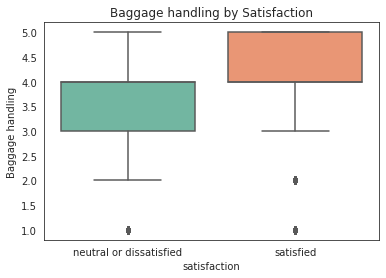

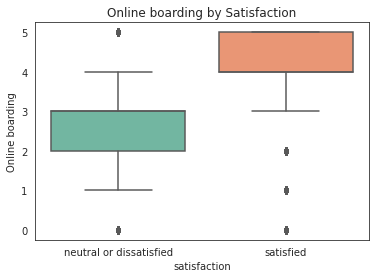

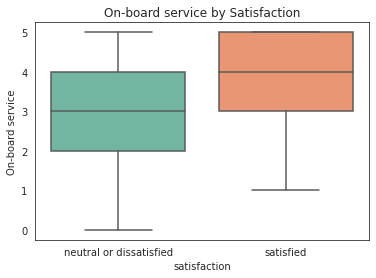

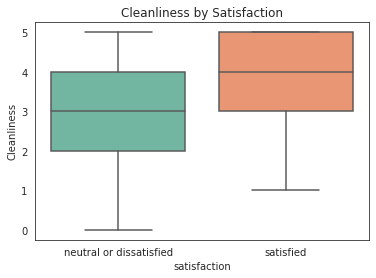

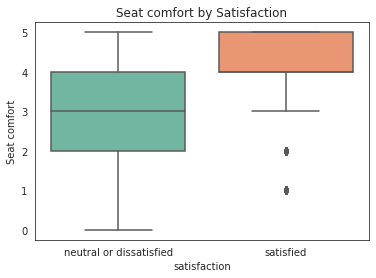

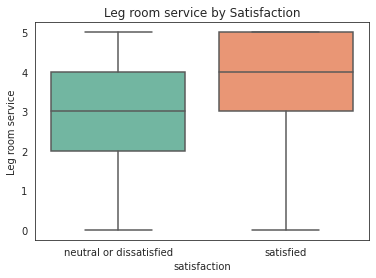

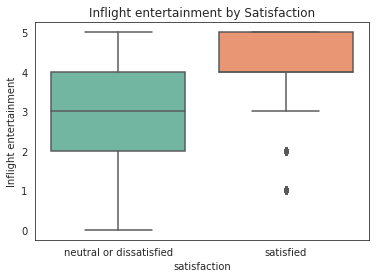

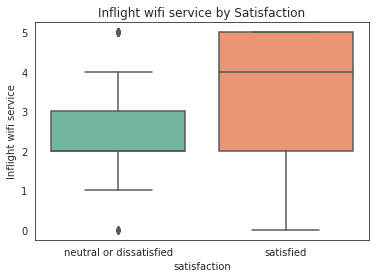

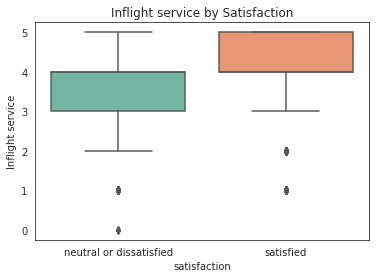

In [ ]:
plot_bar(X)

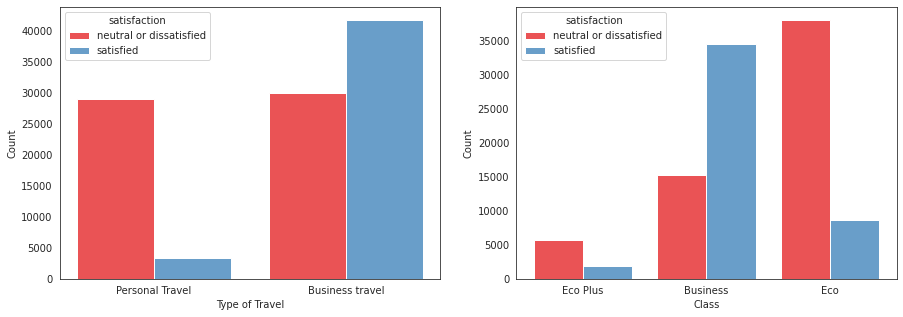

In [ ]:
sns.set_style(style='white')
fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
sns.histplot(data=data_train, x ='Type of Travel', hue='satisfaction', multiple="dodge", shrink=.8, 
             palette='Set1', ax=axes[0])
sns.histplot(data=data_train, x ='Class', hue ='satisfaction', multiple="dodge", shrink=.8, 
             palette='Set1', ax=axes[1]);

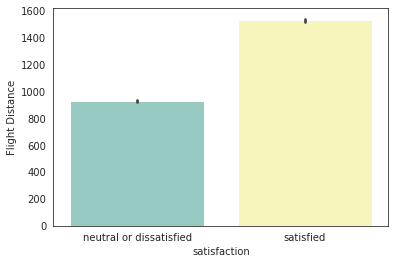

In [ ]:
sns.barplot(data =data_train, x = 'satisfaction',  y ='Flight Distance', palette='Set3');